In [1]:
# pip install -r requirements.txt

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,auc
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import make_pipeline

In [3]:
# Load the saved datasets from the CSV files
X_train = pd.read_csv("../data/X_train.csv", index_col=0)  # Use the first column as index
y_train = pd.read_csv("../data/y_train.csv", index_col=0)  # Use the first column as index
X_test = pd.read_csv("../data/X_test.csv", index_col=0)    # Use the first column as index
y_test = pd.read_csv("../data/y_test.csv", index_col=0)    # Use the first column as index

# Display the first few rows of the loaded datasets
(X_train.head(), y_train.head(), X_test.head(), y_test.head())

(   age         workclass  fnlwgt  education  education-num  \
 0   39         State-gov   77516  Bachelors             13   
 1   50  Self-emp-not-inc   83311  Bachelors             13   
 2   38           Private  215646    HS-grad              9   
 3   53           Private  234721       11th              7   
 4   28           Private  338409  Bachelors             13   
 
        marital-status         occupation   relationship   race     sex  \
 0       Never-married       Adm-clerical  Not-in-family  White    Male   
 1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
 2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
 3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
 4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   
 
    capital-gain  capital-loss  hours-per-week native-country  
 0          2174             0              40  United-States  
 1             0             0          

In [4]:
# For running regression we need all of the features to be numbers, but currently we have:
(X_train.dtypes,X_test.dtypes)

(age                int64
 workclass         object
 fnlwgt             int64
 education         object
 education-num      int64
 marital-status    object
 occupation        object
 relationship      object
 race              object
 sex               object
 capital-gain       int64
 capital-loss       int64
 hours-per-week     int64
 native-country    object
 dtype: object,
 age                int64
 workclass         object
 fnlwgt             int64
 education         object
 education-num      int64
 marital-status    object
 occupation        object
 relationship      object
 race              object
 sex               object
 capital-gain       int64
 capital-loss       int64
 hours-per-week     int64
 native-country    object
 dtype: object)

In [5]:
# We thus want to factorize the object variables. To do this to both the test and the train data whilst ensuring the same key is used
# for both, we briefly concatinate the dataframes before splitting them back up
X_all = pd.concat({'X_train':X_train, 'X_test':X_test})

# Then we factorize
objects = ['workclass','education','marital-status','occupation','relationship','race','sex','native-country']
keys = [0]*len(objects)

for i in range(len(objects)):
    X_all[objects[i]], keys[i] = pd.factorize(X_all[objects[i]])

# Then we return the original test train split
X_train = X_all.loc['X_train']
X_test = X_all.loc['X_test']

(X_train.dtypes,X_test.dtypes)

(age               int64
 workclass         int64
 fnlwgt            int64
 education         int64
 education-num     int64
 marital-status    int64
 occupation        int64
 relationship      int64
 race              int64
 sex               int64
 capital-gain      int64
 capital-loss      int64
 hours-per-week    int64
 native-country    int64
 dtype: object,
 age               int64
 workclass         int64
 fnlwgt            int64
 education         int64
 education-num     int64
 marital-status    int64
 occupation        int64
 relationship      int64
 race              int64
 sex               int64
 capital-gain      int64
 capital-loss      int64
 hours-per-week    int64
 native-country    int64
 dtype: object)

In [6]:
# We thus want to factorize the object variables. To do this to both the test and the train data whilst ensuring the same key is used
# for both, we briefly concatinate the dataframes before splitting them back up
y_all = pd.concat({'y_train':y_train, 'y_test':y_test})

# Then we factorize
y_all['income'], income_key = pd.factorize(y_all['income'])

# Then we return the original test train split
y_train = y_all.loc['y_train']
y_test = y_all.loc['y_test']

(y_train.dtypes,y_test.dtypes)

(income    int64
 dtype: object,
 income    int64
 dtype: object)

In [7]:
# Create logistic regression object
lr = linear_model.LogisticRegression(max_iter=1000)

# Train the model using the training sets
lr.fit(X_train,y_train.values.ravel())

# Make predictions using the testing set
y_pred = lr.predict(X_test)

print(lr.score(X_train,y_train))
print(lr.score(X_test,y_test))

0.798335596118067
0.7900308778120865


C:\Users\Sheri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [8]:
pipe = make_pipeline(StandardScaler(), linear_model.LogisticRegression())

pipe.fit(X_train, y_train.values.ravel())  # apply scaling on training data
y_pred2 = pipe.predict(X_test)

print(pipe.score(X_train, y_train))
print(pipe.score(X_test, y_test))

0.8258912857645698
0.8201367445963829


In [9]:
y_test.value_counts()

income
0         6862
1         2206
Name: count, dtype: int64

In [10]:
null_accuracy = (6862/(6862+2206))
null_accuracy

0.7567269519188354

In [32]:
pipe2 = make_pipeline(MinMaxScaler(), linear_model.LogisticRegression(C=100))

pipe2.fit(X_train, y_train.values.ravel())  # apply scaling on training data
y_pred3 = pipe2.predict(X_test)

trainscore = pipe2.score(X_train, y_train)
print(trainscore)
testscore = pipe2.score(X_test, y_test)
print(testscore)

0.8258410016593755
0.8204675782973092


In [12]:
import sklearn.metrics as metrics
def regression_results(y_true, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print('explained_variance: ', round(explained_variance,4))    
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [13]:
# https://stackoverflow.com/questions/26319259/how-to-get-a-regression-summary-in-scikit-learn-like-r-does
regression_results(y_test,y_pred)

explained_variance:  -0.0115
mean_squared_log_error:  0.1009
r2:  -0.1406
MAE:  0.21
MSE:  0.21
RMSE:  0.4582


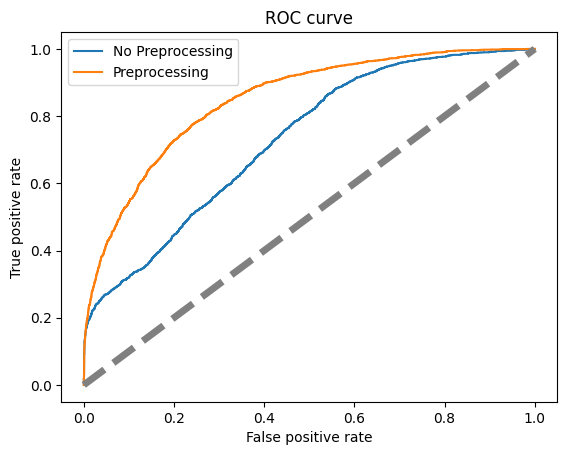

In [14]:
# https://www.kaggle.com/code/shubhamlipare/logistic-regression-with-auc-roc-curve
y_predprob=lr.predict_proba(X_test)
y_predprob2=pipe.predict_proba(X_test)
fpr,tpr,threshold = roc_curve(y_test,y_predprob[:,1])
fpr2,tpr2,threshold = roc_curve(y_test,y_predprob2[:,1])
plt.plot(fpr,tpr)
plt.plot(fpr2,tpr2)
plt.plot([0, 1], [0, 1], '--', lw=5, color = 'grey')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(['No Preprocessing','Preprocessing'])

In [15]:
print(auc(fpr,tpr))
print(auc(fpr2,tpr2))

0.7291075807930096
0.8480098063282541


In [16]:
cm = confusion_matrix(y_test,y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[6609  253]
 [1651  555]]

True Positives(TP) =  6609

True Negatives(TN) =  555

False Positives(FP) =  253

False Negatives(FN) =  1651


<Axes: >

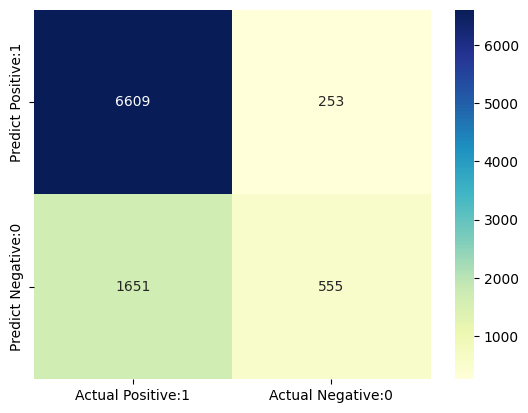

In [17]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [18]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

precision = TP / float(TP + FP)

print('Precision : {0:0.4f}'.format(precision))

Precision : 0.9631


In [19]:
print(classification_report(y_test,y_pred))
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.80      0.96      0.87      6862
           1       0.69      0.25      0.37      2206

    accuracy                           0.79      9068
   macro avg       0.74      0.61      0.62      9068
weighted avg       0.77      0.79      0.75      9068

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      6862
           1       0.72      0.43      0.54      2206

    accuracy                           0.82      9068
   macro avg       0.78      0.69      0.71      9068
weighted avg       0.81      0.82      0.80      9068



(0.0, 1.0)

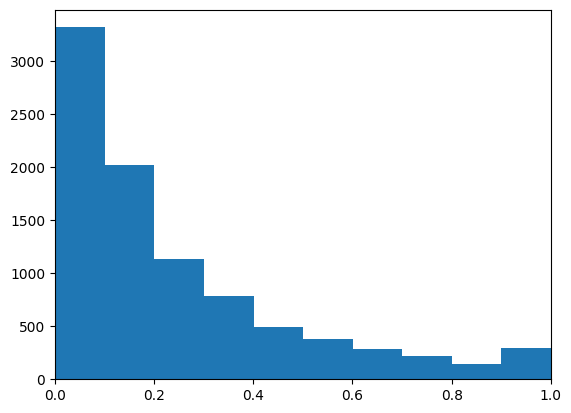

In [20]:
y_pred1 = pipe.predict_proba(X_test)[:, 1]
plt.hist(y_pred1,bins=10)
plt.xlim(0,1)

In [21]:
from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(pipe, X_train, y_train.values.ravel(), cv=5, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.8488


In [24]:
from sklearn.model_selection import cross_val_score

for x in [2,5,10,25,50]:
    scores = cross_val_score(pipe, X_train, y_train.values.ravel(), cv = x, scoring='accuracy')
    
    print('Average cross-validation score: {:.4f} for cv = {}'.format(scores.mean(),x))

print('{:.4f}'.format(trainscore))

Cross-validation scores:[0.82566501 0.82566501]
Average cross-validation score: 0.8257 for cv = 2
Cross-validation scores:[0.82225016 0.82941546 0.82878693 0.82564425 0.82323359]
Average cross-validation score: 0.8259 for cv = 5
Cross-validation scores:[0.82126697 0.82151835 0.82629462 0.83132227 0.82650239 0.83153131
 0.82574805 0.82398793 0.82298215 0.82323359]
Average cross-validation score: 0.8254 for cv = 10
Cross-validation scores:[0.81521056 0.82840981 0.82023884 0.81395349 0.82966688 0.81332495
 0.8372093  0.83092395 0.83155248 0.83469516 0.82149591 0.82338152
 0.83972344 0.82526713 0.8372093  0.8265242  0.82589566 0.82401006
 0.82338152 0.82463859 0.81143935 0.83469516 0.82715273 0.81646763
 0.82578616]
Average cross-validation score: 0.8257 for cv = 25
Cross-validation scores:[0.81909548 0.80904523 0.81532663 0.84045226 0.82160804 0.82035176
 0.80527638 0.82035176 0.82160804 0.8379397  0.80653266 0.82035176
 0.83668342 0.8379397  0.83291457 0.82663317 0.83165829 0.82663317
 0

In [23]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.448115
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                 income   No. Observations:                39774
Model:                          Logit   Df Residuals:                    39760
Method:                           MLE   Df Model:                           13
Date:                Sun, 20 Oct 2024   Pseudo R-squ.:                  0.1841
Time:                        11:49:49   Log-Likelihood:                -17823.
converged:                       True   LL-Null:                       -21844.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
age                0.0015      0.001      1.535      0.125      -0.000       0.003
workclass        

In [34]:
X_train2 = X_train.drop(axis=1,labels=['native-country'])
X_test2 = X_test.drop(axis=1,labels=['native-country'])

pipe5 = make_pipeline(StandardScaler(), linear_model.LogisticRegression())

pipe5.fit(X_train2, y_train.values.ravel())  # apply scaling on training data
y_pred2 = pipe5.predict(X_test2)

print(pipe5.score(X_train2, y_train))
print(trainscore,'\n')
print(pipe5.score(X_test2, y_test))
print(testscore)

0.8257907175541811
0.8258410016593755 

0.8202470224966917
0.8204675782973092


In [35]:
X_train

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,0,77516,0,13,0,0,0,0,0,2174,0,40,0
1,50,1,83311,0,13,1,1,1,0,0,0,0,13,0
2,38,2,215646,1,9,2,2,0,0,0,0,0,40,0
3,53,2,234721,2,7,1,2,1,1,0,0,0,40,0
4,28,2,338409,0,13,1,3,2,1,1,0,0,40,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,2,215419,0,13,2,3,0,0,1,0,0,36,0
48838,64,-1,321403,1,9,6,-1,5,1,0,0,0,40,0
48839,38,2,374983,0,13,1,3,1,0,0,0,0,50,0
48840,44,2,83891,0,13,2,0,3,2,0,5455,0,40,0


In [36]:
keys

[Index(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov', 'Local-gov',
        'Self-emp-inc', 'Without-pay', 'Never-worked'],
       dtype='object'),
 Index(['Bachelors', 'HS-grad', '11th', '9th', 'Masters', 'Some-college',
        'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', '10th',
        'Prof-school', '1st-4th', '5th-6th', 'Preschool', '12th'],
       dtype='object'),
 Index(['Never-married', 'Married-civ-spouse', 'Divorced',
        'Married-spouse-absent', 'Separated', 'Married-AF-spouse', 'Widowed'],
       dtype='object'),
 Index(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
        'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
        'Transport-moving', 'Farming-fishing', 'Tech-support',
        'Protective-serv', 'Machine-op-inspct', 'Priv-house-serv',
        'Armed-Forces'],
       dtype='object'),
 Index(['Not-in-family', 'Husband', 'Wife', 'Own-child', 'Unmarried',
        'Other-relative'],
       dtype='object'),
 Index(['White

In [3]:
?classification_report

Signature:
classification_report(
    y_true,
    y_pred,
    *,
    labels=None,
    target_names=None,
    sample_weight=None,
    digits=2,
    output_dict=False,
    zero_division='warn',
)
Docstring:
Build a text report showing the main classification metrics.

Read more in the :ref:`User Guide <classification_report>`.

Parameters
----------
y_true : 1d array-like, or label indicator array / sparse matrix
    Ground truth (correct) target values.

y_pred : 1d array-like, or label indicator array / sparse matrix
    Estimated targets as returned by a classifier.

labels : array-like of shape (n_labels,), default=None
    Optional list of label indices to include in the report.

target_names : array-like of shape (n_labels,), default=None
    Optional display names matching the labels (same order).

sample_weight : array-like of shape (n_samples,), default=None
    Sample weights.

digits : int, default=2
    Number of digits for formatting output floating point values.
    When ``